# Modern Methods of Data Analysis 3

## Random Variables
When performing observations it is essentially impossible to ban all sources of random fluctuations from the experiment (remember the thing I saied about EVERYTHING, even the measurement instrument being a quantum system and therefor susceptible to random behaviour), as a result all measurements will fluctuate. Some may only fluctuate subtily and others will fluctuate more pronounced.

A variable that is subject to such random fluctuations is called a random variable. In day to day operations however observable quantities (like the voltage from your lab power supply) that can be controlled very tightly are given without an error margin. This is done because the effect of the error is assumed to be minimal and therefor it's effect on the result is neglected for the sake of simplicity.

### Random Vectors
Most often an experiment does not only measure a single observable quantity but a variety of them. So taking a single measurement of the experiment involves reading multiple instruments. The result of a measurements is therefore no longer a number but a vector $\vec{X}$ that incorporate the readings of all instruments involved.
All operations that can be formulated for a single random variable are simply applied to each element of the vector. This gives rise to a matrix formalism for random-variable-vectors that is far more common for real experiments than analyzing each member of the vector individually. So from now on I will include a matrix formulation of all the equations where applicable.

---
### The probability density function
If two subsequent measurements $\omega$ and $\omega'$ are taken of the random variable $X$ with possible values in $S$, it is highly unlikely, that both have the same value. If many measurements are taken (into the thousands or even up to billions) regions ($x_0 \lt \omega \lt x_1$) can emerge where more measurements appear (the average distance between two neighboring measurements is small) along with regiones where less appear ($x_2 \lt \omega \lt x_3$) (the average distance between two neighboring measurements is comparatively large). The likelihood of a measurements appearing in an interval $\text{d}x$ is called the probability density. This probability density can be characterized by the *probability density function* or PDF.

The probability density is defined by:

$$ p(x) = \lim\limits_{N \rightarrow \infty}{\frac{n}{N}\mathrm{d}x}$$ where $n$ is the amount of measurements in the interval $x_0 \leq x \leq x_1$.

As the probability for measuring a value in $S$ is $P(S) = 1$ it follows that

$$ \int_{S} p(x)\,\mathrm{d}x = 1$$

for a single random variable and 

$$ \prod_{i=1}^{n} \int_{S_v} p_i(x_i) \mathrm{d}x_i = 1$$

for an $n$ dimensional vector of random variables from the set of all possible vectors $S_v$.

If $S$ is not a contiguous (as for example the results of a dice roll of an n sided die) then the above integral simplifies to a sum

$$ \sum_{x\in S} p(x) = 1$$

or a sum of summs in the case of a vector with discrete entries

$$ \sum_{x_1 \in S_1} \text{...} \sum_{x_N \in S_N} \prod_{i=1}^N p_i(x_i) = 1$$

---

## Making the PDF visible with Histograms
Using computers as we are, there is a fairly simple numerical way to approximate the PDF. This is done via a histogram. The idea of a histogram is that all measurements that fall into a specific range ($x_0 < x < x_1$) are simply counted without recording their exact value. then the amount of measurements that lie within that interval is visualized by the height of a rectangle with the base of the rectangle being the interval that the measurements lie in. This is not only done for one interval but for the entire range of measurement outcomes. A histogram looks like this

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# first lets produce some (1000) random numbers in the domain [0, 1)
rand_nums = np.random.rand(1000)
# lets define the edges of the intervals that the numbers should be grouped in
bin_edges = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 0.9, 1.0]
#now lets produce a histogram from the numbers
hist, bins = np.histogram(rand_nums, bin_edges)
print("Counts per interval: {}".format(hist))
print("Edges of the intervals: {}".format(bins))

Counts per interval: [102  88  90 104 115 101 195  98 107]
Edges of the intervals: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.8 0.9 1. ]


As you can see, the bin from 0.6 to 0.8 is twice as wide as all the other bins and there also where about twice as many random numbers in that interval. From this we can deduce, that the PDF of the random numbers is likely a constant function. This sort of distribution is called a *uniform distribution*. Let's now plot the histogram

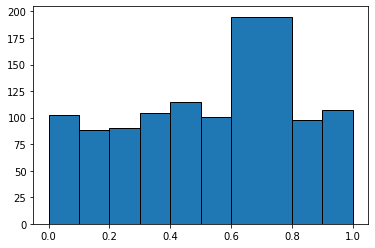

In [4]:
h, b, p = plt.hist(bin_edges[:-1], bin_edges, weights=hist, edgecolor='black') # The result of this function is prevented from being printed by writing it to variables

If we sum up all the entries in all the intervals (that are called **bins** of a histogram) we should get back the total number of measurements

In [5]:
sum(hist)

1000

As you can see, the visualisation is a bit misleading in terms of showing that the PDF is a uniform function. This is because for an interval twice as wide as the rest, we get twice as many counts producing an area that is four times the size it should actually be. To correct for this the height of a bin has to be divided by it's with, so that the factors don't compund but instead cancel each other out.

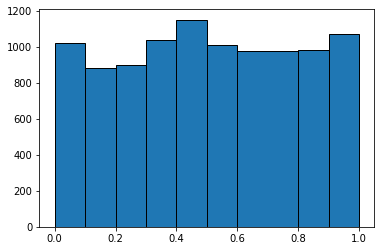

In [6]:
# calculate the width of the bins
bin_width = [left_edge - right_edge for left_edge, right_edge in zip(bin_edges[1:],bin_edges[:-1])]

# correct the correlation between height and width
corrected_hist = [count/width for count, width in zip(hist, bin_width)]

#plot the corrected hist
h, b, p = plt.hist(bin_edges[:-1], bin_edges, weights=corrected_hist, edgecolor='black')

However you can now see, that instead of the number of measurements within any given bin, we now have a number close to the total number of events as the height on each bin so we need to come up with some sort of measure to give the number on the y-axis some meaning (as it currently needs a rather convoluted explanation).

The solution to this problem is to plot the **probability density** instead of the number of counts in each bin. This can be done in the following way 

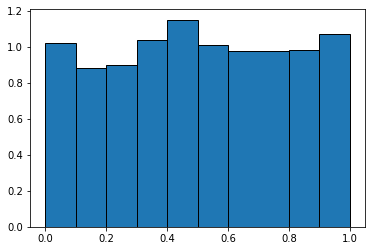

In [7]:
# calculate the density for each bin
relative_count = [count/sum(hist) for count in hist]

# now do the correction for the bin width, just as before
probability_density = [rel_cnt/width for rel_cnt, width in zip(relative_count, bin_width)]

#plot a histogram approximation of the probability density
h, b, p = plt.hist(bin_edges[:-1], bin_edges, weights=probability_density, edgecolor='black')

Now that we have computed the probability density the relative amount of measurements in each bin is the area of the rectangle drawn over the interval of the corresponding bin. This makes it possible to quickly comprehend the shape of a PDF without much effort. (as this is used very often the `plt.hist` function offers the keyword argument `density` that when set to `true` converts the histogram to show the PDF by the process described above).
As the histogram now shows the probability density, it follows that the total Area of the histogram is $P(S) = 1$.

In [8]:
sum([density*width for density, width in zip(probability_density, bin_width)])

0.9999999999999999

which is in deed the case.

And now just for fun lets look at a histogram of a gaussian (also called **normal**) distribution (you will encounter this type of distribution very often). As you will undoublty be able to see, the top edges of the histogram follow the refernce function very closely. 

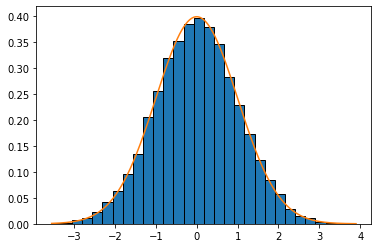

In [9]:
# generate some random numbers following the 'normal' distributed
mu = 0
sigma = 1
normal_rand_nums = np.random.randn(10000) * sigma + mu
# calculate and plot the normalized histogram
h, b, p = plt.hist(normal_rand_nums, bins=30, density=True, edgecolor='black')

# plot the function as a reference
x = np.linspace(min(b), max(b), 1000)
l = plt.plot(x, st.norm.pdf(x))

---
### Sampeling a random variable
In the abstract an experiment is the set of circumstances needed to generate a probability density funciton (a multidimensional one when multiple readings are involved) for the observed quantities. Then the probability density function is interpreted and "laws of nature" are deduced from that. The only way to truly get the probability density is to perform infinite measurements, which, needless to say, is impossible. So instead a **Sample** is taken of the probability density function and these samples are then used to approximate the PDF with the help of models. A sample is nothing more than a group of measurements taken from the PDF.

An experiment can have many different parameters $\vec{\theta}$ that have to be set before taking a sample. In these cases the PDF is dependent on these parameters $\vec{\theta}$. This dependence of the PDF on $\vec{\theta}$ is normally formulated as the "laws" of nature. When these laws are formulated they don't actually describe a PDF but normally a function $\vec{y}=f(\vec{\theta})$. This is done because the PDF is dependent on the specific measurement setup, the underlying principle that is captured by $f$ however is not.

It may be obvious, but it is of course possible to take multiple samples. Sometimes it is useful to change the parameters $\vec{\theta}$ before taking another sample, because the goal is to find out how the PDF is dependent on $\vec{\theta}$ other times another sample is generated to improve overall *statistical significance* (we will get to that at a later point).

---

## Expectation values, means and other Estimators/statistics

The defining characteristic of a random variable is its probability density function. However as a rule the PDF is not known and has to be guessed at with the help of models. However there are a few indicators (or estimators/statistics) that can give you an Idea of how a PDF looks like (without using a histogram) based on a sample drawn form it. These characteristic measures are called **estimators** or **statistics**. An estimator can only be calculated from a Sample containing more than one measurement, without giving garbage results.

### The mean estimator/statistic
The most well known estimator is probably the mean-value estimator.

The mean estimator is defined as:

$$ mean(\{x_i\}) = \langle x\rangle = \frac{1}{n}\sum_{i=1}^n x_i$$

where n is the size of the sample (the amount of measurements in the sample) and $x_i$ is the value of the i-th measurement. For a random vector this is defined as

$$ mean(\{\vec{x}_i\}) = \langle\vec{x}\rangle = \frac{1}{n} \sum_{i=1}^n \vec{x}_i$$

So for the random numbers (both for the gaussian and the uniform distribution) we can calculate the mean

In [74]:
# calculate the mean for the sample drawn from the gaussian distribution
normal_mean = 1/len(normal_rand_nums) * sum(normal_rand_nums)
print("The mean of the normal distribution is: {}".format(normal_mean))

# calculate the mean for the sample drawn from the uniform distribution
uniform_mean = 1/len(rand_nums) * sum(rand_nums)
print("The mean of the uniform distribution in [0, 1): {}".format(uniform_mean))

The mean of the normal distribution is: -0.00891992692385321
The mean of the uniform distribution in [0, 1): 0.4969981166748284


---

### Estimators are random variables
As the estimator/statistic is a function of a sample drawn from a random variable, it is itself a random variable. This means, that an estimator will vary from sample to sample. As such A sample of estimators can be generated and an estimator can be calculated from that sample (even the same estimator can be calculated on the sample of estimators). This can be done recursively without end (the only problem there is, that to generate a sample of a sample, the amount of measurements that need to be taken grows exponentially with each recursive level. This means that it is unpractical at best to calculate more than an estimator for a sample of samples).
So lets try and calculate the mean of means for a uniform distribution.

In [10]:
# a sample of random numbers of length n can be drawn from a uniform distribution [0,1) with np.random.rand(n)
n = 20
mean_sample_size = 100
sample_of_means = [np.mean(np.random.rand(n)) for i in range(mean_sample_size)]
print(sample_of_means)

# now calculate the mean of the means
mean_of_means = np.mean(sample_of_means)
print("\nMean of means: {}".format(mean_of_means))

[0.47781243525246453, 0.46234426580604626, 0.39296673714384067, 0.5303653962565584, 0.40063917442652636, 0.5806647113280826, 0.5650684736362902, 0.5373535061081534, 0.4735646481405034, 0.43183099985891504, 0.5609222811208431, 0.4151842477218578, 0.5219703454693956, 0.4890117508386031, 0.5582699498822603, 0.433752179296516, 0.503466758420625, 0.5169945672419074, 0.6330541884744576, 0.4741319349757669, 0.5992828190959582, 0.48838846418331705, 0.4774121741079808, 0.5459360264897681, 0.540823200071192, 0.532058794338502, 0.5328762554019367, 0.5064329156864403, 0.502784324013972, 0.5264897447122533, 0.3550892179189121, 0.5468931855474266, 0.4090138037599328, 0.3812258288288738, 0.5722828918779901, 0.3455364371020806, 0.5142588544934021, 0.5346841345099851, 0.5190235011153413, 0.5649426533676345, 0.4921197501425646, 0.621603956349009, 0.5961427022273881, 0.44188597069836977, 0.5970402075867833, 0.5121606209277565, 0.5966806453260758, 0.4479673014250084, 0.38174108802357126, 0.404949275365915

It is of course also possible to draw a histogram for the sample of means.

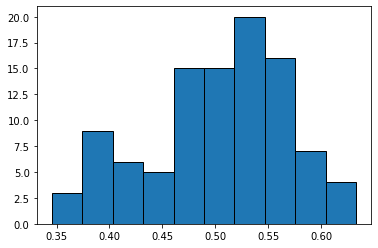

In [11]:
h, b, p = plt.hist(sample_of_means, bins=10, edgecolor='black')

Though with "only" 100 values for the mean it is fairly difficult to tell from looking at the histogram, how the means are distributed.
To improve the quality of the PDF we can calculate the mean more often, this means that we need to generate n times the amount of random numbers.

In [12]:
# lets track how many numbers are generated in total
numbers_generated = 0

# definition of the mean
def mean(data):
    return 1/len(data) * sum(data)

# define some functions that calculate the mean and mean of mean and mean of mean of means
def generate_mean_from_uniform_sample(n):
    global numbers_generated;
    numbers_generated = numbers_generated + n
    return mean(np.random.rand(n))

def generate_sample_of_means(m, n):
    return [generate_mean_from_uniform_sample(n) for i in range(m)]

def generate_sample_of_mean_of_means(o, m, n):
    return [mean(generate_sample_of_means(m, n)) for i in range(o)]

mean_of_means_sample_size = 100
mean_sample_size = 100
sample_size = 20
mean_of_means = generate_sample_of_mean_of_means(mean_of_means_sample_size, mean_sample_size, sample_size)
print("mean of mean of means: {}".format(mean(mean_of_means)))
print("total amount of random numbers generated: {}".format(numbers_generated))

mean of mean of means: 0.5003806264178176
total amount of random numbers generated: 200000


So to generate a single mean of means of means 200,000 random numbers have to be generated. So be careful how deep you do that recursion (and check that what you do makes sense.

---

### The variance Estimator
besides the mean of a sample the variance is also a very common metric for distributions. The variance indicates how close the sample values are to the mean. A small variance means that the idividual measurements are close to the mean while a large variance indicates a large distance to the mean.

The variance is defined as:

$$ \mathrm{var}(\{x_i\}) = \frac{1}{n} \sum_{i=0}^n (x_i-\langle x \rangle)^2 $$

and for vectors

$$ \mathrm{var}(\{\vec{x}_i\}) = \frac{1}{n} \sum_{i=0}^n (\vec{x}_i-\langle \vec{x} \rangle)^2 $$

and can also be computed from the measurements in a sample directly (without first calculating the mean) through

$$ \mathrm{var}(\{x_i\}) = \frac{1}{2N^2} \sum_{i, j=0}^n (x_i - x_j)^2$$

also for vectors

$$ \mathrm{var}(\{\vec{x}_i\}) = \frac{1}{2N^2} \sum_{i, j=0}^n (\vec{x}_i - \vec{x}_j)^2$$

The variance can of course also be defined if we don't have a specific sample $\{\vec{x}_i\}$ but also if we have a PDF $p(x)$. In this case the we rely on the previously given definition of the mean of a random variable to calculate it's variance $\sigma_X^2$.

In the next two formulars (and in all following ones) I'll only be writing the vector formulation as the scalar case is simply the vector case wher the vector has length one. To denote a specific value in a measurement vector $\vec{x}$ I'll write $x_i$. If we take $k$ measurements we produce $k$ measurement vectors $\vec{x}_j$ when I wan't to denote a specific value in one of these vectors I'll write $(x_i)_j$ which means that I am refering to the i'th scalar in the j'th measurement.

$$ \mathrm{var}(\vec{X}) = \sum_{\vec{x}} (\vec{x} - \langle \vec{X}\rangle)^2$$ where we sum over all possibilities for x (so $\forall \vec{x} \in S$)

We can of course also extend that into the continuous realm with the following expression

$$ \mathrm{var}(\vec{X}) = \int_{S_1} ... \int_{S_n} (x_1 - \langle X_1\rangle)^2 ... (x_n - \langle X_n\rangle)^2 \mathrm{d}x_1 ...\mathrm{d}x_n$$

This is essentially a volume integral over the entire subspace that yields a possible experimental outcome.
The continuous example only really works, if the pdf is known analytically (either exact or by approximation).

So lets give that a spin with the random numbers generated in the histogram example

In [14]:
# define the variance incorporating the mean
def varm(data):
    return 1/len(data) * sum([(val - mean(data))**2 for val in data])

# define the variance without the mean
def var(data):
    distances = np.ravel([[(vali - valj) for valj in data] for vali in data])
    return 1/(2*len(data)**2) * sum (distances**2)

print("Variance calculated with mean: {}".format(varm(rand_nums)))
print("Variance calculated without mean: {}".format(var(rand_nums)))

Variance calculated with mean: 0.08361814867579008
Variance calculated without mean: 0.08361814867578825


---

### The Expectation value as generalisation of the mean

For this part let's assume there is a [random variable](https://en.wikipedia.org/wiki/Random_variable) $X$ with the domain $\mathbb{R}$ (this means that the random variable can take on any value in $\mathbb{R}$). Let's further assume there is a function $f$ with the [domain](https://en.wikipedia.org/wiki/Function_(mathematics)) $\mathbb{R}$ and the [codomain](https://en.wikipedia.org/wiki/Function_(mathematics)) $\mathbb{R}$. Now I'll ask the question what is the mean of $f(X)$?

To answer this question we can use the concept of an expectation value to expand the prevoius definitions of the mean and the variance. The Expectation value is (like the mean) the value that has the same probability density to it's left as it has to it's right (in the one dimensional case). The expectation value is defined (in the case of this (contiguous example) as

$$\mathrm{E}(\vec{X}) = \int_{S_{X}} f(\vec{x})p(\vec{x}) \mathrm{d}\vec{x} $$

where $p(x)$ is the PDF for $X$ and $f(x)$ is the aforementioned function. In the case of $X$ having a discrete domain (for example $\mathbb{N}$) the 

When we set $f(x) = x$ then we naturally get the mean estimator for the sample.

Now we can also set that $f(x)$ to any other function of our liking (like for example a function that describes how the
directly measured value is translated by the electronics in the experiment into the value that is actually stored in a long term storage (like a disk drive in a data center).

So in short the expectation value is the mean value for an arbitrary function that is applied to the actual values transforming them in any way.

---

### The Variance as a different Expectation value

If we now alter the definition of $f(x)$ to something along the line of $f(\vec{x}) = (\vec{x} - \langle\vec{x}\rangle)^2$ then we get the Expectation value for the variance. Remember that the variance is a random variable when we look at a set of different samples (or measurement runs) and calculate the variance for each of the samples. That means that the variance itsself has a PDF and we can calculate the expectation value for any random variable which will be the variance of the underlying experiments within some margin of uncertainty.

So for continuous values we get:

$$ E[var(X)] = \int_{S_X} (\vec{x} - \langle \vec{x} \rangle)^2 \cdot p(\vec{x}) \mathrm{d}\vec{x}$$

and for a discrete version

$$ E[var(X)] = \sum_{\vec{x}} (\vec{x}_i - \langle \vec{x} \rangle)^2 \cdot p(\vec{x}) $$

This helps to show that the Expectation value can be calculated for any arbitrary estimator.